<a href="https://colab.research.google.com/github/yamidur/POO-2025_2/blob/main/Actividad_3_POO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


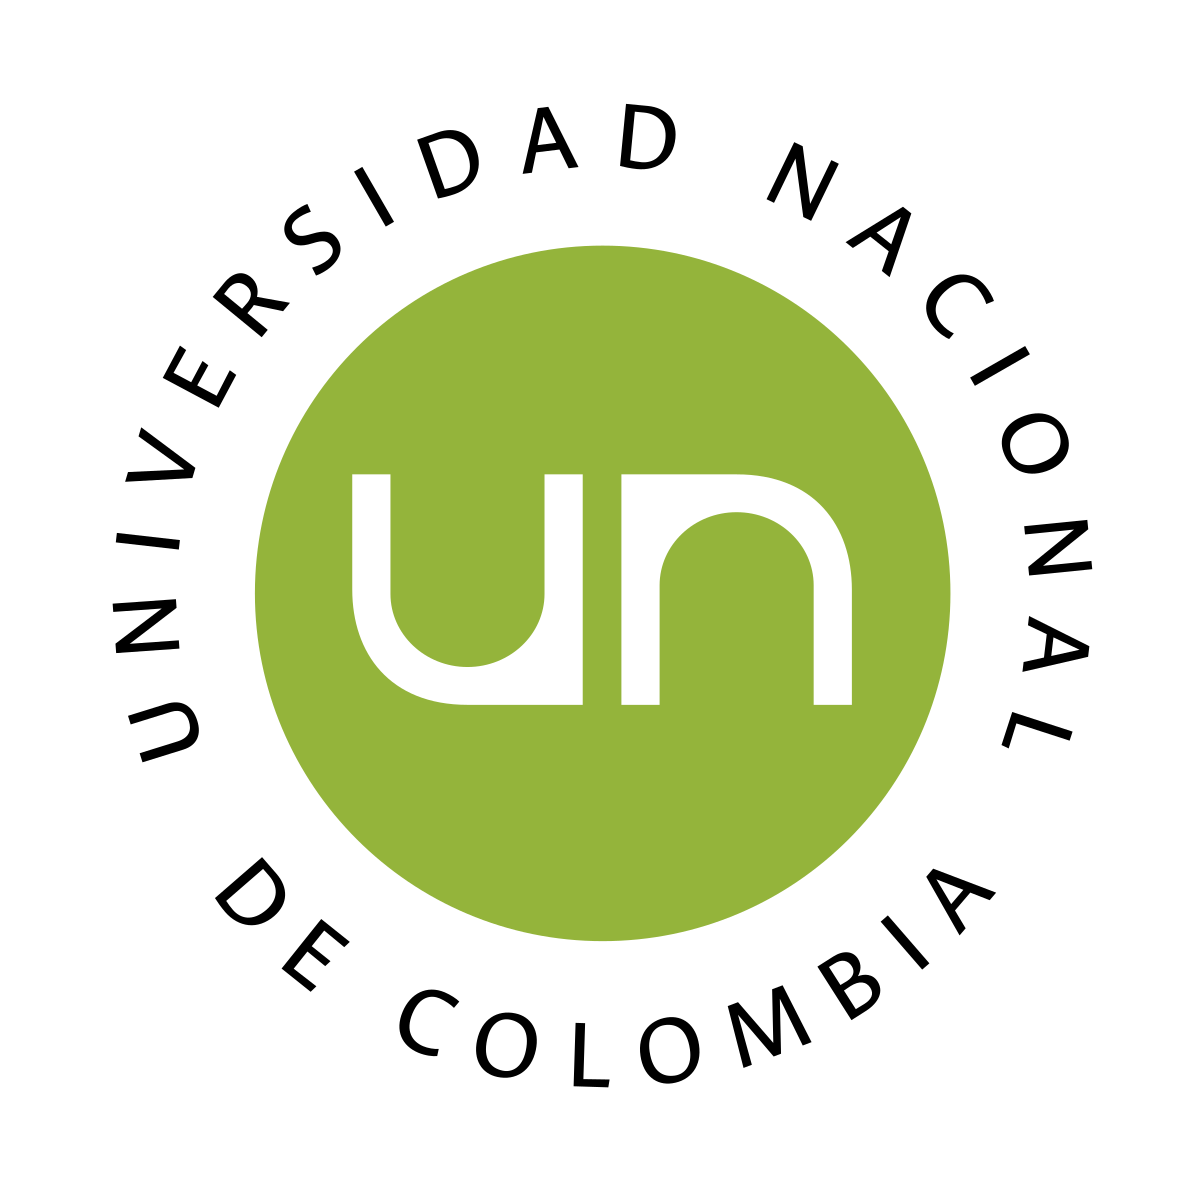

In [ ]:
# @title
import base64
from IPython.display import display, HTML

with open("logo.png", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode()

html_code = f"""
<style>
  @page {{
    size: A4;
    margin: 0;
  }}
  body, html {{
    margin: 0;
    padding: 0;
    height: 100%;
    width: 100%;
  }}

  .cover {{
    height: 50cm;
    width: 100%;
    box-sizing: border-box;
    font-family: Arial, sans-serif;
    text-align: center;
    display: flex;
    flex-direction: column;
    justify-content: space-between;
    padding-top: 3cm;
    padding-bottom: 3cm;
  }}

  .section {{
    max-width: 17cm;
    margin-left: auto;
    margin-right: auto;
  }}

  .cover img {{
    width: 120px;
    margin-bottom: 20px;
  }}

  h1 {{
    font-size: 24pt;
    margin: 10px 0;
  }}

  h2 {{
    font-size: 20pt;
    margin: 10px 0;
  }}

  h3 {{
    font-size: 16pt;
    margin: 5px 0;
  }}

  p {{
    line-height: 1.6;
    font-size: 12pt;
    margin: 5px 0;
  }}
</style>

<div class="cover">
  <div class="section">
    <img src="data:image/png;base64,{encoded_image}" alt="Logo UNAL">
    <h1>UNIVERSIDAD NACIONAL DE COLOMBIA</h1>
  </div>

  <div class="section">
    <h2>Programación orientada a objetos</h2>
  </div>

  <div class="section">
    <h3><i>Actividad 3</i></h3>
  </div>

<div class="section">
    <p><strong>Docente:</strong><br>
    Walter Hugo Arboleda Mazo</p>
  </div>

  <div class="section">
    <p><strong>Estudiante:</strong><br>
    Yamid Urrego Galvis – C.C. 1000756146<br>
    yurregog@unal.edu.co</p>
  </div>

  <div class="section">
    <p><strong>Medellín, Colombia</strong><br>
    <strong>Octubre 14 de 2025</strong></p>
  </div>
</div>
"""

display(HTML(html_code))

## 1. Ejercicio 8.2 pagina 483 (Texto: Ejercicios de programación)

**Enunciado: Notas**

Se requiere desarrollar un programa con interfaz gráfica de usuario que genere una ventana donde se solicite el ingreso de cinco notas obtenidas por un estudiante.

El programa debe calcular y mostrar en la parte inferior de la ventana los siguientes datos:

- El promedio de notas ingresadas.

- La desviación estándar de las notas ingresadas.

- La mayor nota obtenida.

- La menor nota obtenida.

In [13]:
# -----------------------------------------------------------------
# 1. funciones y librerías requeridas
# -----------------------------------------------------------------

import ipywidgets as widgets
from IPython.display import display, HTML
import base64
import numpy as np


class Notas:
    def __init__(self, lista_notas):
        self.lista_notas = np.array(lista_notas)

    def calculo_promedio(self):
        """Calcula el promedio de las notas."""
        return np.mean(self.lista_notas)

    def calculo_desviacion_estandar(self):
        """Calcula la desviación estándar de las notas."""
        return np.std(self.lista_notas)

    def nota_mayor(self):
        """Obtiene la nota más alta."""
        return np.max(self.lista_notas)

    def nota_menor(self):
        """Obtiene la nota más baja."""
        return np.min(self.lista_notas)

# -----------------------------------------------------------------
# 2. Interfaz gráfica que visualizará el usuario
# -----------------------------------------------------------------

# Estilos y layouts
estilo_label = widgets.Layout(width='150px', justify_content='flex-start')
layout_campo = widgets.Layout(width='120px')
layout_boton = widgets.Layout(width='120px', margin='10px 5px 10px 0px')

# MODIFICACIÓN DE ESTILO: Fondo de color para el contenedor principal
layout_fondo = widgets.Layout(padding='15px', border='2px solid #ccc', background_color='lightcyan')

# Titulo
titulo = HTML("<h2 style='color: #0056b3;'>Calculadora de Notas</h2>")

# Notas de entrada
entradas_notas = []
for i in range(5):
    fila = widgets.HBox([
        widgets.Label(value=f"Nota {i+1}:", layout=estilo_label),
        widgets.FloatText(value=0.0, layout=layout_campo)
    ])
    entradas_notas.append(fila)

# Se establecen los botones necesarios
boton_calcular = widgets.Button(
    description='Calcular',
    button_style='success', # Verde
    layout=layout_boton
)
boton_limpiar = widgets.Button(
    description='Limpiar',
    button_style='warning',
    layout=layout_boton
)
caja_botones = widgets.HBox([boton_calcular, boton_limpiar])

# Se configuran los campos de salida
label_promedio_val = widgets.Label(value="")
label_desviacion_val = widgets.Label(value="")
label_mayor_val = widgets.Label(value="")
label_menor_val = widgets.Label(value="")
label_error = widgets.Label(value="", style={'color': 'red', 'font_weight': 'bold'}) # Estilo para el error

fila_promedio = widgets.HBox([widgets.Label(value="Promedio = ", layout=estilo_label), label_promedio_val])
fila_desviacion = widgets.HBox([widgets.Label(value="Desviación estándar = ", layout=estilo_label), label_desviacion_val])
fila_mayor = widgets.HBox([widgets.Label(value="Valor mayor = ", layout=estilo_label), label_mayor_val])
fila_menor = widgets.HBox([widgets.Label(value="Valor menor = ", layout=estilo_label), label_menor_val])

# -----------------------------------------------------------------
# 3. Se realiza el calculo de las estadísticas
# -----------------------------------------------------------------

def calcular_estadisticas(b):
    label_error.value = ""
    try:
        valores_notas = [fila.children[1].value for fila in entradas_notas]
        calculadora = Notas(valores_notas)

        label_promedio_val.value = f"{calculadora.calculo_promedio():.2f}"
        label_desviacion_val.value = f"{calculadora.calculo_desviacion_estandar():.2f}"
        label_mayor_val.value = f"{calculadora.nota_mayor()}"
        label_menor_val.value = f"{calculadora.nota_menor()}"
    except Exception as e:
        label_error.value = "Error: Verifica que todas las notas sean números."
        limpiar_celdas(None)

def limpiar_celdas(b):
    for fila in entradas_notas:
        fila.children[1].value = 0.0
    label_promedio_val.value = ""
    label_desviacion_val.value = ""
    label_mayor_val.value = ""
    label_menor_val.value = ""
    label_error.value = ""

# Asociamos las funciones a los eventos de cada botón
boton_calcular.on_click(calcular_estadisticas)
boton_limpiar.on_click(limpiar_celdas)

# -----------------------------------------------------------------
# 4. Se muestra la interfaz gráfica
# -----------------------------------------------------------------

interfaz_completa = widgets.VBox([
    *entradas_notas,
    caja_botones,
    fila_promedio,
    fila_desviacion,
    fila_mayor,
    # Se agrega el layout de color al VBox para darle color de fondo
    fila_menor,
    label_error
], layout=layout_fondo)

display(titulo, interfaz_completa)

#2. Ejercicio 8.3 pagina 495 (Texto: Ejercicios de programación)

**Enunciado: Persona**

Se requiere desarrollar un programa con interfaz gráfica de usuario que permita calcular el volumen y superficie de varias figuras geométricas. Las figuras geométricas son el cilindro, la esfera y la pirámide.

- Para el cilindro se solicitan su radio y altura (en centímetros).

- Para la esfera, su radio (en centímetros).

- Para la pirámide, su base, altura y apotema (en centímetros).

Una vez ingresados estos datos, el programa calcula el volumen y superficie de cada figura. Para desarrollar el programa se debe crear una jerarquía de clases para las diferentes figuras geométricas requeridas.



In [24]:
import ipywidgets as widgets
from IPython.display import display, HTML
import math

# -----------------------------------------------------------------
# 1. JERARQUÍA DE CLASES (LÓGICA POO)
# -----------------------------------------------------------------

class FormaEspacial:
    """Clase base para las formas tridimensionales y sus cálculos."""
    def __init__(self):
        pass

    def obtener_volumen(self):
        raise NotImplementedError("Este método debe ser implementado por la subclase.")

    def obtener_superficie(self):
        raise NotImplementedError("Este método debe ser implementado por la subclase.")

class CuerpoCilindrico(FormaEspacial):
    """Implementa las operaciones para el Cilindro."""
    def __init__(self, radio_base, altura_cuerpo):
        super().__init__()
        self.radio_base = radio_base
        self.altura_cuerpo = altura_cuerpo

    def obtener_volumen(self):
        return math.pi * (self.radio_base ** 2) * self.altura_cuerpo

    def obtener_superficie(self):
        area_lateral_calc = 2 * math.pi * self.radio_base * self.altura_cuerpo
        area_bases_calc = 2 * math.pi * (self.radio_base ** 2)
        return area_lateral_calc + area_bases_calc

class GloboGeometrico(FormaEspacial):
    """Implementa las operaciones para la Esfera."""
    def __init__(self, radio_base):
        super().__init__()
        self.radio_base = radio_base

    def obtener_volumen(self):
        return (4/3) * math.pi * (self.radio_base ** 3)

    def obtener_superficie(self):
        return 4 * math.pi * (self.radio_base ** 2)

class ConoTruncado(FormaEspacial):
    """Implementa las operaciones para la Pirámide de base cuadrada."""
    def __init__(self, lado_base, altura_vertical, apotema_lateral):
        super().__init__()
        self.lado_base = lado_base
        self.altura_vertical = altura_vertical
        self.apotema_lateral = apotema_lateral

    def obtener_volumen(self):
        return ((self.lado_base ** 2) * self.altura_vertical) / 3

    def obtener_superficie(self):
        area_base_calc = self.lado_base ** 2
        area_lateral_calc = 2 * self.lado_base * self.apotema_lateral
        return area_base_calc + area_lateral_calc

# -----------------------------------------------------------------
# 2. LÓGICA DE LA INTERFAZ GRÁFICA (Widgets)
# -----------------------------------------------------------------

# Estilos comunes
estilo_label_ui = widgets.Layout(width='120px')
layout_campo_ui = widgets.Layout(width='150px')

# *** CORRECCIÓN CLAVE: CAMBIAR output_panel_central a un VBox ***
# Usaremos este VBox para contener la interfaz activa (Cilindro, Esfera, etc.)
# Esto permite reemplazar el contenido usando .children, eliminando el bug de display().
panel_contenido_dinamico = widgets.VBox([])


def crear_panel_cilindro():
    """Construye y devuelve los widgets para la interfaz del Cilindro."""
    titulo_ui = widgets.HTML("<h3>Cilindro</h3>")
    radio_in_ui = widgets.FloatText(description="Radio (cms):", style={'description_width': 'initial'}, layout=layout_campo_ui)
    altura_in_ui = widgets.FloatText(description="Altura (cms):", style={'description_width': 'initial'}, layout=layout_campo_ui)
    volumen_out_ui = widgets.Label(value="Volumen (cm3): -")
    superficie_out_ui = widgets.Label(value="Superficie (cm2): -")
    boton_proceso = widgets.Button(description="Calcular", button_style='success')

    def ejecutar_calculo(b):
        try:
            forma = CuerpoCilindrico(radio_in_ui.value, altura_in_ui.value)
            volumen_out_ui.value = f"Volumen (cm3): {forma.obtener_volumen():.2f}"
            superficie_out_ui.value = f"Superficie (cm2): {forma.obtener_superficie():.2f}"
        except:
            volumen_out_ui.value = "Volumen (cm3): Error"
            superficie_out_ui.value = "Superficie (cm2): Error"

    boton_proceso.on_click(ejecutar_calculo)
    return widgets.VBox([titulo_ui, radio_in_ui, altura_in_ui, boton_proceso, volumen_out_ui, superficie_out_ui])

def crear_panel_esfera():
    """Construye y devuelve los widgets para la interfaz de la Esfera."""
    titulo_ui = widgets.HTML("<h3>Esfera</h3>")
    radio_in_ui = widgets.FloatText(description="Radio (cms):", style={'description_width': 'initial'}, layout=layout_campo_ui)
    volumen_out_ui = widgets.Label(value="Volumen (cm3): -")
    superficie_out_ui = widgets.Label(value="Superficie (cm2): -")
    boton_proceso = widgets.Button(description="Calcular", button_style='success')

    def ejecutar_calculo(b):
        try:
            forma = GloboGeometrico(radio_in_ui.value)
            volumen_out_ui.value = f"Volumen (cm3): {forma.obtener_volumen():.2f}"
            superficie_out_ui.value = f"Superficie (cm2): {forma.obtener_superficie():.2f}"
        except:
            volumen_out_ui.value = "Volumen (cm3): Error"
            superficie_out_ui.value = "Superficie (cm2): Error"

    boton_proceso.on_click(ejecutar_calculo)
    return widgets.VBox([titulo_ui, radio_in_ui, boton_proceso, volumen_out_ui, superficie_out_ui])

def crear_panel_piramide():
    """Construye y devuelve los widgets para la interfaz de la Pirámide."""
    titulo_ui = widgets.HTML("<h3>Pirámide</h3>")
    base_in_ui = widgets.FloatText(description="Base (cms):", style={'description_width': 'initial'}, layout=layout_campo_ui)
    altura_in_ui = widgets.FloatText(description="Altura (cms):", style={'description_width': 'initial'}, layout=layout_campo_ui)
    apotema_in_ui = widgets.FloatText(description="Apotema (cms):", style={'description_width': 'initial'}, layout=layout_campo_ui)
    volumen_out_ui = widgets.Label(value="Volumen (cm3): -")
    superficie_out_ui = widgets.Label(value="Superficie (cm2): -")
    boton_proceso = widgets.Button(description="Calcular", button_style='success')

    def ejecutar_calculo(b):
        try:
            forma = ConoTruncado(base_in_ui.value, altura_in_ui.value, apotema_in_ui.value)
            volumen_out_ui.value = f"Volumen (cm3): {forma.obtener_volumen():.2f}"
            superficie_out_ui.value = f"Superficie (cm2): {forma.obtener_superficie():.2f}"
        except:
            volumen_out_ui.value = "Volumen (cm3): Error"
            superficie_out_ui.value = "Superficie (cm2): Error"

    boton_proceso.on_click(ejecutar_calculo)
    return widgets.VBox([titulo_ui, base_in_ui, altura_in_ui, apotema_in_ui, boton_proceso, volumen_out_ui, superficie_out_ui])

# -----------------------------------------------------------------
# 3. MENÚ PRINCIPAL Y EJECUCIÓN DEL FLUJO
# -----------------------------------------------------------------

# Crear botones de navegación (menú)
btn_cuerpo = widgets.Button(description="Cilindro")
btn_globo = widgets.Button(description="Esfera")
btn_cono = widgets.Button(description="Pirámide")
menu_principal_nav = widgets.HBox([btn_cuerpo, btn_globo, btn_cono])

# Funciones de control de vista (¡Ahora con corrección!)
def activar_cilindro(b):
    """Reemplaza el contenido del panel dinámico con la interfaz del cilindro."""
    panel_contenido_dinamico.children = [crear_panel_cilindro()]

def activar_esfera(b):
    """Reemplaza el contenido del panel dinámico con la interfaz de la esfera."""
    panel_contenido_dinamico.children = [crear_panel_esfera()]

def activar_piramide(b):
    """Reemplaza el contenido del panel dinámico con la interfaz de la pirámide."""
    panel_contenido_dinamico.children = [crear_panel_piramide()]

# Asociar eventos de los botones a las funciones de control
btn_cuerpo.on_click(activar_cilindro)
btn_globo.on_click(activar_esfera)
btn_cono.on_click(activar_piramide)

# Mostrar la interfaz inicial al usuario
titulo_aplicacion = HTML("<h2>Figuras Geométricas</h2>")
display(titulo_aplicacion, menu_principal_nav, panel_contenido_dinamico)

# Opcional: Mostrar una interfaz por defecto al inicio
activar_cilindro(None)

VBox()